In [1]:
import cv2
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
img = cv2.imread('/home/siddharth/Documents/BTP/Parcellation/Data/Segmented/test1.jpg')

In [3]:
import numpy as np

In [4]:
img_n = img.copy()

In [5]:
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,  83, 148, 243, 250, 251, 252,
       253, 254, 255], dtype=uint8)

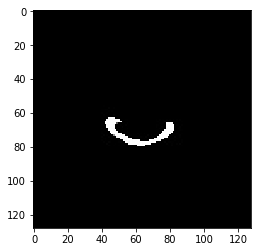

In [6]:
plt.imshow(img)

In [7]:
img.shape

(128, 128, 3)

In [8]:
ret, b_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

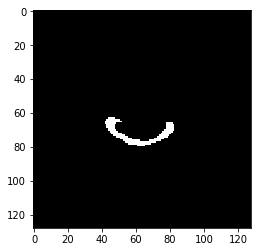

In [9]:
plt.imshow(b_img)
#plt.imshow(img)

In [ ]:
# b_imgi = np.rot90(b_img) # 180 inversion for inverted image

In [10]:
horizontal_img = b_img.copy()
vertical_img = b_img.copy()
both_img = b_img.copy()

In [11]:
horizontal_img = cv2.flip( b_img, 0 )
vertical_img = cv2.flip( b_img, 1 )
both_img = cv2.flip( b_img, -1 )

In [12]:
b_imgi = horizontal_img

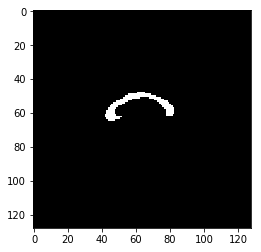

In [13]:
plt.imshow(b_imgi)

In [ ]:
# psx = 0
# psy = 0
# for i in range(b_img.shape[0]):
#     for j in range(b_img.shape[1]):
#         if(b_img[j][i][0]!=0):
#             psx = i
#             psy = j
#             break
#     if(psx!=0):
#         break

In [14]:
# for one j value we r seeing different values of i, for which pixel intensity is 255. 
L = []
for j in range(b_imgi.shape[1]): 
    for i in range(b_imgi.shape[0]):
        if(b_imgi[i][j][0]==255):
            L.append((j,i))

In [15]:
L

[(42, 61),
 (42, 62),
 (43, 59),
 (43, 60),
 (43, 61),
 (43, 62),
 (43, 63),
 (44, 57),
 (44, 58),
 (44, 59),
 (44, 60),
 (44, 61),
 (44, 62),
 (44, 63),
 (44, 64),
 (45, 56),
 (45, 57),
 (45, 58),
 (45, 59),
 (45, 60),
 (45, 61),
 (45, 62),
 (45, 63),
 (45, 64),
 (46, 55),
 (46, 56),
 (46, 57),
 (46, 58),
 (46, 59),
 (46, 60),
 (46, 61),
 (46, 62),
 (46, 63),
 (46, 64),
 (47, 54),
 (47, 55),
 (47, 56),
 (47, 57),
 (47, 58),
 (47, 59),
 (47, 60),
 (47, 61),
 (47, 62),
 (47, 63),
 (47, 64),
 (48, 54),
 (48, 55),
 (48, 56),
 (48, 57),
 (48, 61),
 (48, 62),
 (48, 63),
 (49, 53),
 (49, 54),
 (49, 55),
 (49, 56),
 (49, 62),
 (49, 63),
 (50, 53),
 (50, 54),
 (50, 55),
 (50, 62),
 (50, 63),
 (51, 52),
 (51, 53),
 (51, 54),
 (51, 55),
 (51, 62),
 (52, 52),
 (52, 53),
 (52, 54),
 (53, 51),
 (53, 52),
 (53, 53),
 (53, 54),
 (54, 50),
 (54, 51),
 (54, 52),
 (54, 53),
 (55, 50),
 (55, 51),
 (55, 52),
 (55, 53),
 (56, 49),
 (56, 50),
 (56, 51),
 (56, 52),
 (57, 49),
 (57, 50),
 (57, 51),
 (57, 52),

In [16]:
L[0]

(42, 61)

In [17]:
L[-1]

(82, 60)

In [18]:
from matplotlib.lines import Line2D

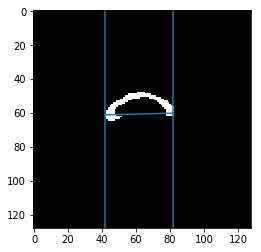

In [19]:
plt.axvline(L[0][0])
plt.axvline(L[-1][0])
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
plt.gca().add_line(line)
plt.imshow(b_imgi)

In [20]:
#Weitelson
psx = L[0][0]
pex = L[-1][0]
distance = L[-1][0] - L[0][0]
regions = []
regions.append(psx)
# regions.append(psx+int((1/3)*distance))
# regions.append(psx+int((1/2)*distance))
# regions.append(psx+int((2/3)*distance))
# regions.append(psx+int((4/5)*distance))
#Hofer
regions.append(psx+int((1/6)*distance))
regions.append(psx+int((1/2)*distance))
regions.append(psx+int((2/3)*distance))
regions.append(psx+int((3/4)*distance))
regions.append
regions.append(pex)

In [21]:
regions

[42, 48, 62, 68, 72, 82]

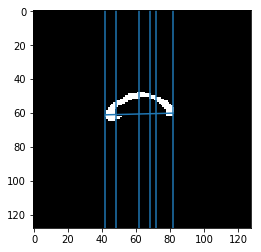

In [22]:
plt.axvline(regions[0])
plt.axvline(regions[1])
plt.axvline(regions[2])
plt.axvline(regions[3])
plt.axvline(regions[4])
plt.axvline(regions[5])
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
plt.gca().add_line(line)
plt.imshow(b_imgi)

In [ ]:
-----------------------------------------------------------------------------------------

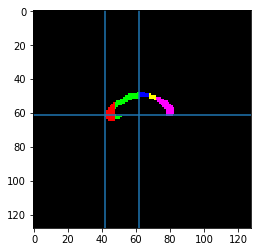

In [23]:
for i in range(b_imgi.shape[0]):
    for j in range(regions[0], regions[1]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 255)
            b_imgi.itemset((i, j, 1), 0)
            b_imgi.itemset((i, j, 2), 0)
    for j in range(regions[1], regions[2]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 0)
            b_imgi.itemset((i, j, 1), 255)
            b_imgi.itemset((i, j, 2), 0)
    for j in range(regions[2], regions[3]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 0)
            b_imgi.itemset((i, j, 1), 0)
            b_imgi.itemset((i, j, 2), 255)
    for j in range(regions[3], regions[4]):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 255)
            b_imgi.itemset((i, j, 1), 255)
            b_imgi.itemset((i, j, 2), 0)
    for j in range(regions[4], regions[5]+1):
        if(b_imgi[i][j][0]!=0):
            b_imgi.itemset((i, j, 0), 255)
            b_imgi.itemset((i, j, 1), 0)
            b_imgi.itemset((i, j, 2), 255)
line = Line2D([L[0][0],L[-1][0]],[L[0][1],L[-1][1]])
# plt.gca().add_line(line)
plt.axhline(y=L[0][1])
plt.axhline(y= b_imgi.shape[0])
# plt.axhline(y=L[-1][1])
plt.axvline(regions[0])
plt.axvline(regions[2])
plt.imshow(b_imgi)

In [24]:
#anterior 
a = b_imgi[L[0][1]][L[0][0]][0]
b = b_imgi[L[0][1]][L[0][0]][1]
c = b_imgi[L[0][1]][L[0][0]][2]

#posterior
d = b_imgi[L[-1][1]][L[-1][0]][0]
e = b_imgi[L[-1][1]][L[-1][0]][1]
f = b_imgi[L[-1][1]][L[-1][0]][2]

In [ ]:
print(a)

In [ ]:
print(b)

In [ ]:
print(c)

In [25]:
print(b_imgi.shape[0])

128


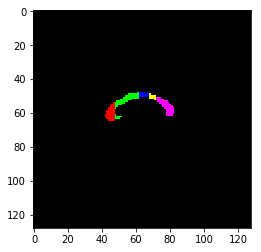

In [26]:
plt.imshow(b_imgi)

In [27]:
#parcellate using small assumption that the geometric baseline is a horizontal line for each
#assumption half i.e. on anterior and  as well as posterior.

#for upright image (original)
for j in range(regions[0],regions[3]):
    for i in range(L[0][1], b_imgi.shape[0]):
        if(b_imgi[i][j][1] == 255):
            b_imgi[i][j][0] = a 
            b_imgi[i][j][1] = b
            b_imgi[i][j][2] = c
            
for j in range(regions[2],regions[5]):
    for i in range(L[-1][1], b_imgi.shape[0]):
        if(b_imgi[i][j][1] == 255):
            b_imgi[i][j][0] = d 
            b_imgi[i][j][1] = e
            b_imgi[i][j][2] = f

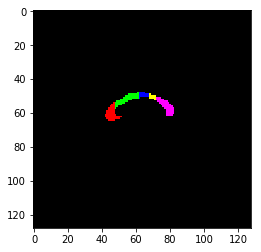

In [28]:
plt.imshow(b_imgi)